# Coding in Action Lab II 
## Group Project A - Week 2 - Due by June 26, 23:59

You have to complete this project if your group number is in (1,4,7,10,...), i.e., if it is a multiple of 3, plus 1.

### Instructions ###

- Fill the following cell with the name, student ID and luiss email address of all members of  your team.

- Using this notebook, complete the following list of tasks, **motivating** your choices and **commenting** on your findings.

- Turn in the notebook with your work on the course page on learn.luiss.it, just once for each group.

This team is composed by:

Giulia Ferrandino (303641, giulia.ferrandino@studenti.luiss.it), Anna Toppino (296541, anna.toppino@studenti.luiss.it), Virginia Passeggio (290661, v.passeggio@studenti.luiss.it), Vittoria Montemarani (304901, vittoria.montemarani@studenti.luiss.it ), Sofia di Bella (304571, Sofia.dibella@studenti.luiss.it)

**NB**: unless otherwise stated, all tasks refer to the dataset included in the 'data/' folder

## Task 5 (Session 5)
### Project work 5: correlation, scatterplots, linear regression, rescaling, standardization

- **T11:** Price-sales relation:
    - **T11.1:** Using suitable plots and metrics, discuss how the number of items sold relates to the item price.
    - **T11.2:** For each product type, find the average price and the total number of sales for items of that type.
    - **T11.3:** Using suitable plots and metrics, show how the total number of sales of a item type relates to the average price for items of that type.
- **T12:** Regression:
    - **T12.1:** Import the dataset included in the 'new_data' folder and drop the date. Standardize the dataset, select the feature that better correlates with the bike rental count and fit a linear regression.
    
_______
_______

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale


#T11.1
#load the data
sales_data = pd.read_csv("IT_sales.csv")

#remove rows with missing values and duplicates
sales_data.dropna(subset=["Order Date"], inplace=True)
sales_data.drop_duplicates(inplace=True)

#save the changes in the .csv file
sales_data.to_csv("ITsales.csv", index=False)

#create a DataFrame
df = pd.DataFrame(sales_data)

#create two variables for prices and quantities
prices = df["Price Each"]
quantities = df["Quantity Ordered"]

#create a histogram
plt.hist(prices, bins=15)
plt.xlabel("Prices")
plt.ylabel("Ordered Quantities")
plt.title("Quantities sold by price")
plt.show()

#calculate the correlation between price and quantity
price_quantity_corr = np.corrcoef(prices, quantities)
print(price_quantity_corr)


ModuleNotFoundError: No module named 'sklearn'

In [4]:
#T11.2
#calculate the total number of sales per product type
sales_per_type = df.groupby("Type").size()
print("Total number of sales per type:", sales_per_type)

#calculate the total expenditure and total quantity per product type
total_expenditure_per_type = df.groupby("Type")["Price Each"].sum()
total_quantity_per_type = df.groupby("Type")["Quantity Ordered"].sum()

#calculate the average price per product type
average_price_per_type = total_expenditure_per_type / total_quantity_per_type
print("Average price per product type: ", average_price_per_type)

Total number of sales per type: Type
Batteries       41170
Cable           43469
Headphones      47672
Laptop           8847
Monitor         23995
Smartphone      14427
TV               4794
Washer/dryer     1312
dtype: int64
Average price per product type:  Type
Batteries          2.398809
Cable             12.405192
Headphones        78.329062
Laptop          1372.603495
Monitor          263.470415
Smartphone       618.055940
TV               298.815707
Washer/dryer     600.000000
dtype: float64


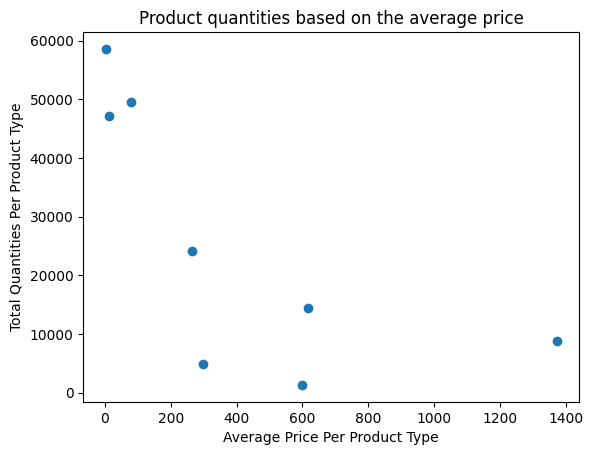

[[ 1.         -0.69725582]
 [-0.69725582  1.        ]]


In [5]:
#T11.3
#create a scatter plot
plt.scatter(average_price_per_type, total_quantity_per_type)
plt.title("Product quantities based on the average price")
plt.xlabel("Average Price Per Product Type")
plt.ylabel("Total Quantities Per Product Type")
plt.show()

#calculate the correlation between average price and total quantity
avg_price_total_quantity_corr = np.corrcoef(average_price_per_type, total_quantity_per_type)
print(avg_price_total_quantity_corr)


In [17]:
from sklearn.preprocessing import scale
import seaborn as sns
#T12
#T12.1 #load another set of data
bike_rental = pd.read_csv("bike_rental.csv")
df_bike = pd.DataFrame(bike_rental)

# Standardize the data using the scale function
df_bike["zseason"] = scale(df_bike["season"])          
df_bike["zyear"] = scale(df_bike["year"])
df_bike["zmonth"] = scale(df_bike["month"])
df_bike["zhour"] = scale(df_bike["hour"])
df_bike["zholiday"] = scale(df_bike["holiday"])
df_bike["zweekday"] = scale(df_bike["weekday"])
df_bike["zworkingday"] = scale(df_bike["workingday"])
df_bike["zweather"] = scale(df_bike["weather"])
df_bike["ztemperature"] = scale(df_bike["temperature"])
df_bike["zhumidity"] = scale(df_bike["humidity"])
df_bike["zwind_speed"] = scale(df_bike["wind_speed"])
df_bike["zbike_rental_count"] = scale(df_bike["bike_rental_count"])

# Calculate the correlation between the variables and the bike rental count
variables = ["zseason", "zyear", "zmonth", "zhour", "zholiday", "zweekday", "zworkingday", "zweather", "ztemperature", "zhumidity", "zwind_speed"]
correlations = {}

for var in variables:
    corr = np.corrcoef(df_bike[var], df_bike["zbike_rental_count"])[0, 1]
    correlations[var] = corr
    print(f"Correlation between {var} and zbike_rental_count: {corr}")

# Find the feature with the highest correlation
best_feature = max(correlations, key=correlations.get)
print(f"The feature that better correlates with the bike rental count is: {best_feature} with a correlation of {correlations[best_feature]}")

# Calculate the coefficients of the linear regression for the best feature
beta1 = np.cov(df_bike[best_feature], df_bike["zbike_rental_count"])[0, 1] / np.var(df_bike[best_feature])
print("beta 1 is: ", beta1)

beta0 = df_bike["zbike_rental_count"].mean() - (beta1 * df_bike[best_feature].mean())
print("beta 0 is: ", beta0)

# Create a scatter plot with the regression line for the best feature
sns.regplot(x=df_bike[best_feature], y=df_bike["zbike_rental_count"], color="black")
plt.scatter(df_bike[best_feature], df_bike["zbike_rental_count"])
plt.xlabel(best_feature)
plt.ylabel("Bike Rental Count")
plt.title(f"Linear regression line for {best_feature}")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

## Task 6 (Session 6)
### Project work 6: implement an RFM model 

- **T13:** Recency-Frequency-Monetary (RFM) model:
    - **T13.1:** Build a RFM dataframe.
    - **T13.2:** Standardize each column, verify the existence of outliers and treat them appropriately.
    - **T13.3:** Use the k-means method to classify the customers, using the elbow method to choose k.
    - **T13.4:** Label each cluster and use a histogram to visualize the number of customers in each cluster.
_____
_____

In [13]:
#T13
#First we need to load and preprocess the data
df = pd.read_csv("data/IT_sales.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
snapshot_date = df['Order Date'].max() + pd.Timedelta("1 day")

#T13.1 Calculate RFM values
RFM = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  #recency
    'Order ID': 'count',    #frequency
    'Price Each': 'sum'     #economic/monetary
}).rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Price Each': 'Monetary'})

RFM = (RFM - RFM.mean()) / RFM.std()

# Display the RFM dataframe
print("RFM Dataframe:")
print(RFM.head())
print() 

RFM Dataframe:
              Recency  Frequency  Monetary
Customer ID                               
1           -0.281371   0.380937 -0.665014
2            0.006174   0.380937  0.479900
3           -0.396388   2.036191  1.937147
5           -0.453897   0.144472 -0.518408
6           -0.683932   0.617402 -0.289517



In [14]:
#T13.2: 
Q1 = RFM.quantile(0.25)
Q3 = RFM.quantile(0.75)
IQR = Q3 - Q1
outliers = (RFM < (Q1 - 1.5 * IQR)) | (RFM > (Q3 + 1.5 * IQR))

# Removing outliers
RFM_no_outliers = RFM[~(outliers.any(axis=1))]

# Visualizing outliers using boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data=RFM)
plt.title('Boxplot of Standardized RFM Values')
plt.show()



TypeError: boxplot() missing 1 required positional argument: 'x'

<Figure size 1000x600 with 0 Axes>

In [ ]:
#T13.3: Using the k-means method we classify the customers
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(RFM)
    distortions.append(sum(np.min(cdist(RFM, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / RFM.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## Task 7 (Session 7)
### Project work 7: implement a recommendation system

       
- **T14:** User-based collaborative filtering :
    - **T14.1:** For each user, define a user vector as long as the number of unique products in the dataset and whose $i$-th element is the total quantity of product $i$ bought by that user.
    - **T14.2:** Use the vectors defined in T16.1 to build a user similarity matrix.
    - **T14.3:** Use the similarity matrix defined in T14.2 to define a function that, given a user, creates recommendations for that user.
_______
_______
